### Name of the Dataset - Pfizer Vaccine Sentiment Analysis





In [67]:
#Uploading libraries
import pandas as pd
import numpy as np
import os
import gensim #Topic Modelling Technicque called LDA (Latent Dirichlet Allocation)
from gensim.utils import simple_preprocess



In [68]:
# Mount google drive:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [69]:
# Go to folder containing data file
path = "/gdrive/MyDrive/Colab Notebooks"

In [70]:
# Change working directory
os.chdir(path)

# list files
os.listdir()            # List all files in the folder

['training.csv',
 'train.tsv',
 'test.tsv',
 'vaccination_tweets.csv',
 'Session 2 DEVP.ipynb',
 'Copy of credit_card transactions network analysis (1).ipynb',
 'Copy of credit_card transactions network analysis.ipynb',
 'MLP Class Assignment.ipynb',
 'Copy of 1_data_pipelining_template.ipynb',
 'ad_processed.csv',
 '1_data_pipelining_template (1).ipynb',
 'Copy of structure in data--ad data.ipynb',
 '7_higgs_boson_xgb.ipynb',
 '1_data_pipelining_template.ipynb',
 'Practice set 1 DLNLP',
 'Practice set 2 DLNLP',
 'Video Processing Practice Set DLNLP.ipynb',
 'Facial Emotion Recognition Practice Set DLNLP.ipynb',
 'Restaurant Revenue Prediction',
 'RRP.ipynb',
 'Untitled0.ipynb',
 'Restaurant Review Sentiment Analysis.ipynb',
 '300features_40minwords_10context',
 'Untitled1.ipynb',
 'Copy of 2.simple_rnn_IMDB.ipynb',
 'drugsComTrain_raw.tsv',
 'Pfizer SA.ipynb',
 'recipes_wordcloud.png',
 'pfizer hit and trial.ipynb',
 'automotive churn prediction',
 "Natasha's Copy of Automotive churn 

In [71]:
# Reading dataset using pandas
df = pd.read_csv("vaccination_tweets.csv")

In [72]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,1381891596459859969,Prof. Guy Ashton,NaN,Professor of tropical medicine and infectious ...,2020-03-18 07:59:46,238,249,32754,False,2021-04-13 08:46:45,"Off for my second vaccine, then work. 👋💉\n#Cur...","['Cured', 'PfizerBioNTech']",Twitter for Android,0,4,False
8078,1381873083598839816,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,143996,462,197,False,2021-04-13 07:33:11,“When” appears to be a million-dollar question...,NaN,Twitter for iPhone,0,0,False
8079,1381839418055532546,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 05:19:25,Second #PfizerBioNTech vaccine shot done! Than...,"['PfizerBioNTech', 'HongKong', 'HKTwitterGetsV...",Twitter for iPhone,0,4,False
8080,1381824559519723523,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 04:20:22,Second #PfizerBioNTech vaccine is officially i...,"['PfizerBioNTech', 'HongKong', 'HK']",Twitter for iPhone,0,3,False


In [73]:
# viewing the first 5 rows 
df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [74]:
# viewing the last 5 rows 
df.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
8077,1381891596459859969,Prof. Guy Ashton,NaN,Professor of tropical medicine and infectious ...,2020-03-18 07:59:46,238,249,32754,False,2021-04-13 08:46:45,"Off for my second vaccine, then work. 👋💉\n#Cur...","['Cured', 'PfizerBioNTech']",Twitter for Android,0,4,False
8078,1381873083598839816,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,143996,462,197,False,2021-04-13 07:33:11,“When” appears to be a million-dollar question...,NaN,Twitter for iPhone,0,0,False
8079,1381839418055532546,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 05:19:25,Second #PfizerBioNTech vaccine shot done! Than...,"['PfizerBioNTech', 'HongKong', 'HKTwitterGetsV...",Twitter for iPhone,0,4,False
8080,1381824559519723523,Anisha Sindher,Hong Kong S.A.R,A Wander Woman & a (M)Ad woman: Senior Copywri...,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 04:20:22,Second #PfizerBioNTech vaccine is officially i...,"['PfizerBioNTech', 'HongKong', 'HK']",Twitter for iPhone,0,3,False
8081,1381817640855904257,Common Indian Man,Mumbai,Common man created by Late RK Laxman.,2009-10-21 10:06:41,216,1134,28405,False,2021-04-13 03:52:53,@mid_day #DGCI why not allow other proven Vacc...,"['DGCI', 'PfizerBioNTech', 'Moderna', 'JnJ']",Twitter for Android,0,0,False


In [75]:
#prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8082 non-null   int64 
 1   user_name         8082 non-null   object
 2   user_location     6452 non-null   object
 3   user_description  7576 non-null   object
 4   user_created      8082 non-null   object
 5   user_followers    8082 non-null   int64 
 6   user_friends      8082 non-null   int64 
 7   user_favourites   8082 non-null   int64 
 8   user_verified     8082 non-null   bool  
 9   date              8082 non-null   object
 10  text              8082 non-null   object
 11  hashtags          6133 non-null   object
 12  source            8081 non-null   object
 13  retweets          8082 non-null   int64 
 14  favorites         8082 non-null   int64 
 15  is_retweet        8082 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 899.9+ KB


In [76]:
#returns description of the data in the DataFrame
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,8.082000e+03,8.082000e+03,8082.000000,8.082000e+03,8082.000000,8082.000000
mean,1.354990e+18,3.550042e+04,1192.207127,1.513661e+04,1.472037,8.690671
std,1.265681e+16,2.914947e+05,2982.597309,4.882913e+04,12.922145,59.121769
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.344901e+18,1.100000e+02,165.000000,4.172500e+02,0.000000,0.000000
50%,1.351682e+18,4.805000e+02,465.000000,2.329000e+03,0.000000,1.000000
75%,1.364592e+18,2.089750e+03,1249.500000,1.124975e+04,1.000000,4.000000
max,1.384788e+18,1.371493e+07,103226.000000,1.166459e+06,678.000000,2315.000000


In [77]:
# to find out the data types of the various columns
df.dtypes


id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [78]:
#number of rows and columns
df.shape


(8082, 16)

In [79]:
# the column names in the dataset
df.columns


Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [80]:
# to find out if there are any null values
df.isnull().sum()


id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [81]:
import seaborn as sns

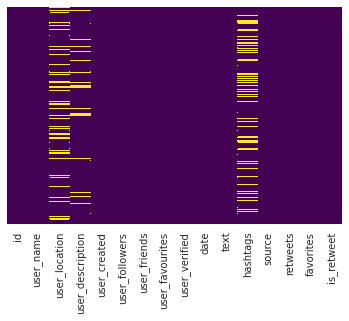

In [82]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')
#to visually show the null values

In [83]:
# For the hashtag column, imputing the word 'missing' in  NAN 
def fill_missing(dataset):
    df["hashtags"].fillna(value="missing", inplace=True)
   
    return (df)

In [84]:
df = fill_missing(df)

In [85]:
# dropping these two columns which seem irrelevant 
df= df.drop(['user_location', 'user_description'], axis=1)


In [86]:
df

,id,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,missing,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",missing,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,1381891596459859969,Prof. Guy Ashton,2020-03-18 07:59:46,238,249,32754,False,2021-04-13 08:46:45,"Off for my second vaccine, then work. 👋💉\n#Cur...","['Cured', 'PfizerBioNTech']",Twitter for Android,0,4,False
8078,1381873083598839816,theSun,2009-07-29 01:58:44,143996,462,197,False,2021-04-13 07:33:11,“When” appears to be a million-dollar question...,missing,Twitter for iPhone,0,0,False
8079,1381839418055532546,Anisha Sindher,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 05:19:25,Second #PfizerBioNTech vaccine shot done! Than...,"['PfizerBioNTech', 'HongKong', 'HKTwitterGetsV...",Twitter for iPhone,0,4,False
8080,1381824559519723523,Anisha Sindher,2010-11-30 05:24:01,105,66,2766,False,2021-04-13 04:20:22,Second #PfizerBioNTech vaccine is officially i...,"['PfizerBioNTech', 'HongKong', 'HK']",Twitter for iPhone,0,3,False


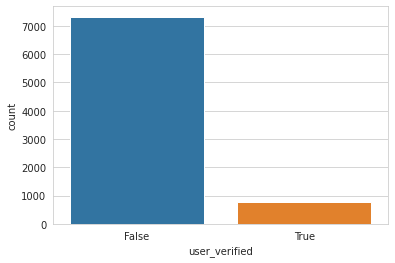

In [87]:
# plot to see the number of people who are verified 
sns.countplot(x='user_verified',data=df)
sns.set_style("whitegrid")

In [88]:
# finding mean of the followers of the users
df['user_followers'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0          405
1          834
2           10
3        49165
4          152
         ...  
8077       238
8078    143996
8079       105
8080       105
8081       216
Name: user_followers, Length: 8082, dtype: int64>

In [89]:

df['source'].unique()


array(['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone',
       'TweetDeck', 'Buffer', 'Twitter for iPad', 'Twitter Media Studio',
       'ThreadReaderApp', 'Instagram', 'SocialFlow', 'Hootsuite Inc.',
       'LinkedIn', 'Twitter for Mac', '24liveblog', 'Publer ', 'IFTTT',
       'Socialbakers', 'Falcon Social Media Management ', 'Echobox',
       'Microsoft Power Platform', 'Nonli', 'Sendible', nan, 'EastMojo',
       'Twitter Media Studio - LiveCut', 'Tweetbot for Mac', 'GT_Backend',
       'SocialNewsDesk', 'Sprout Social', 'TweetCaster for Android',
       'UberSocial for Android', 'Blog2Social APP', 'WordPress.com',
       'Paper.li', 'News Users', 'ETRetail.com', 'Tweetbot for iΟS',
       'Sprinklr Publishing', 'CoSchedule', 'Hocalwire Social Share',
       'Canva', 'Nelio Content', 'Flying Eze', 'News Medical', 'dlvr.it',
       'Fenix 2', 'Imminent News', 'Sprinklr',
       'Salesforce - Social Studio', 'Echofon', 'Article Tweetbot'],
      dtype=object)

In [90]:
df['source'].value_counts()


Twitter for iPhone                 2864
Twitter Web App                    2302
Twitter for Android                1897
TweetDeck                           462
Twitter for iPad                    229
Instagram                            92
Buffer                               51
Hootsuite Inc.                       40
Blog2Social APP                      15
IFTTT                                15
Nonli                                 9
LinkedIn                              9
SocialFlow                            7
Sendible                              6
Microsoft Power Platform              6
Tweetbot for iΟS                      6
Twitter for Mac                       5
24liveblog                            5
WordPress.com                         5
Nelio Content                         4
dlvr.it                               4
ETRetail.com                          4
Paper.li                              4
Echobox                               3
Flying Eze                            3


In [91]:
#Separating columns
df=df[['text']]

In [92]:
#Cleaning the data
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
#pat3 = r'(\\x(.){2})'
#pat4 = r'b'
combined_pat = r'|'.join((pat1,pat2))
def review_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df['text']
test_result = []
for t in testing:
    test_result.append(review_cleaner(t))
test_result[0]

'same folks said daikon paste could treat a cytokine storm pfizerbiontech'

In [93]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [95]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [96]:
#Sentiment analysis
analyzer = SentimentIntensityAnalyzer()

df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['text']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['text']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['text']]

<ipython-input-96-e1dbb1529204>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
<ipython-input-96-e1dbb1529204>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['text']]
<ipython-input-96-e1dbb1529204>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [97]:
#calling the dataframe
df

,text,compound,neg,neu,pos
0,Same folks said daikon paste could treat a cyt...,0.4019,0.000,0.787,0.213
1,While the world has been on the wrong side of ...,-0.1027,0.125,0.766,0.109
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.2500,0.000,0.875,0.125
3,"Facts are immutable, Senator, even when you're...",0.0000,0.000,1.000,0.000
4,Explain to me again why we need a vaccine @Bor...,0.0000,0.000,1.000,0.000
...,...,...,...,...,...
8077,"Off for my second vaccine, then work. 👋💉\n#Cur...",0.0000,0.000,1.000,0.000
8078,“When” appears to be a million-dollar question...,0.0000,0.000,1.000,0.000
8079,Second #PfizerBioNTech vaccine shot done! Than...,0.5399,0.000,0.721,0.279
8080,Second #PfizerBioNTech vaccine is officially i...,0.4738,0.000,0.838,0.162


In [98]:
#Creating a dataframe of positive data
positive=df[df['compound'] > 0]

In [99]:
positive


,text,compound,neg,neu,pos
0,Same folks said daikon paste could treat a cyt...,0.4019,0.000,0.787,0.213
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.2500,0.000,0.875,0.125
5,Does anyone have any useful advice/guidance fo...,0.7003,0.000,0.707,0.293
6,it is a bit sad to claim the fame for success ...,0.5423,0.112,0.650,0.238
7,There have not been many bright days in 2020 b...,0.8933,0.057,0.598,0.345
...,...,...,...,...,...
8075,@ProfPaulYoung @JeremyFarrar @robinson_julia @...,0.2500,0.000,0.867,0.133
8076,Had my second jab. 🎉\nJust flirting with the n...,0.2023,0.000,0.913,0.087
8079,Second #PfizerBioNTech vaccine shot done! Than...,0.5399,0.000,0.721,0.279
8080,Second #PfizerBioNTech vaccine is officially i...,0.4738,0.000,0.838,0.162


In [100]:
#taking a sample of 1000 positive reviews
p=positive['text'].iloc[1000]

In [101]:
p

'@JanetEBaldwin @UKChange It’s totally against all the #PfizerBioNTech manufacturer’s advice as well , so ppl who ha… https://t.co/Ek7I7JEi3C'

In [102]:
pip install spacy && python -m spacy download en


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-17 17:34:03.995736: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 10.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [103]:
#defining a function for lemmatisation 
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [104]:
#defining a finction to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [105]:
p

'@JanetEBaldwin @UKChange It’s totally against all the #PfizerBioNTech manufacturer’s advice as well , so ppl who ha… https://t.co/Ek7I7JEi3C'

In [106]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['crypto','even','early'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(positive.text, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[positive.text], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [108]:
import spacy

In [109]:
# Remove Stop Words
data_words_nostops = remove_stopwords(positive.text)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ','ADV'])
print(data_lemmatized[:1])


[['folk', 'daikon', 'paste', 'storm']]


In [110]:
data_lemmatized


[['folk', 'daikon', 'paste', 'storm'],
 ['astrazeneca', 'russian', 'vaccine', 'last', 'year'],
 ['useful',
  'advice',
  'guidance',
  'covid',
  'vaccine',
  'safe',
  'https',
  'eifsyqoekn'],
 ['bit',
  'sad',
  'claim',
  'fame',
  'success',
  'vaccination',
  'patriotic',
  'competition'],
 ['many', 'bright', 'day', 'good', 'election', 'https', 'xxfx'],
 ['bbcnew', 'well'],
 ['also',
  'new',
  'information',
  'health',
  'care',
  'provider',
  'patient',
  'million',
  'https'],
 ['woman', 'provider', 'safety'],
 ['day', 'approval', 'people', 'tol'],
 ['top', 'medical', 'news', 'advancement', 'past', 'week'],
 ['pfizerbiontech', 'pfizer', 'covidvaccine', 'dream', 'poss', 'https'],
 ['style', 'approve', 'vaccine'],
 ['interesting',
  'detailed',
  'article',
  'well',
  'supplychain',
  'help',
  'https'],
 ['last', 'night'],
 ['respect',
  'due',
  'process',
  'approval',
  'instead',
  'surely',
  'multiple',
  'https'],
 ['coronaviru', 'vaccine', 'pfizerbiontech', 'amp', 'v

In [111]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [112]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [113]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10, #change it 1-10
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           per_word_topics=True)

In [114]:
from gensim.models import CoherenceModel
# Compute Coherence Score for topic 2
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5883270439693029


In [115]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.327*"pfizerbiontech" + 0.051*"amp" + 0.022*"world" + 0.021*"friend" + '
  '0.020*"fully" + 0.019*"team" + 0.019*"mrna" + 0.017*"kid" + 0.017*"staff" + '
  '0.016*"real"'),
 (1,
  '0.142*"thank" + 0.068*"grateful" + 0.042*"great" + 0.032*"excited" + '
  '0.027*"storage" + 0.025*"effect" + 0.023*"scientist" + 0.023*"side" + '
  '0.020*"process" + 0.019*"time"'),
 (2,
  '0.170*"pfizer" + 0.099*"first" + 0.097*"dose" + 0.062*"biontech" + '
  '0.052*"covidvaccine" + 0.033*"number" + 0.032*"today" + 0.031*"science" + '
  '0.019*"trial" + 0.013*"clinical"'),
 (3,
  '0.136*"well" + 0.042*"month" + 0.027*"quick" + 0.026*"least" + '
  '0.019*"condition" + 0.018*"company" + 0.018*"transportation" + '
  '0.017*"pretty" + 0.017*"jab" + 0.016*"needle"'),
 (4,
  '0.068*"happy" + 0.044*"infection" + 0.034*"easy" + 0.027*"amazing" + '
  '0.021*"work" + 0.020*"phase" + 0.017*"thing" + 0.014*"late" + 0.013*"back" '
  '+ 0.013*"government"'),
 (5,
  '0.070*"week" + 0.042*"far" + 0.039*"news" + 0

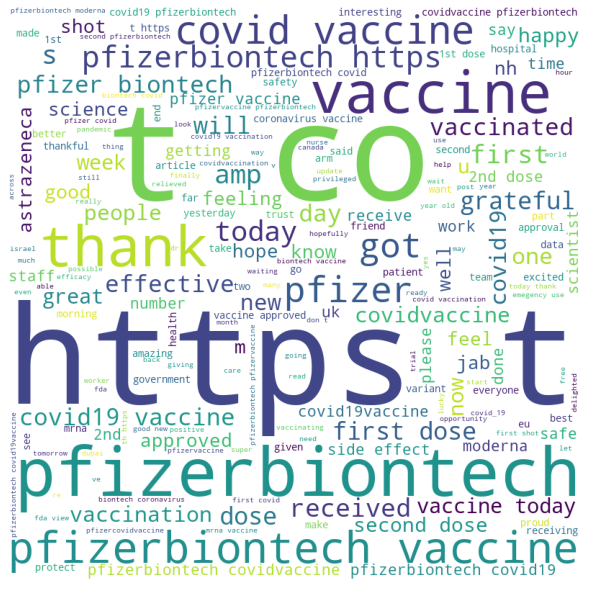

In [116]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in positive.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [117]:
#creating dataframe of negative data
negative=df[df['compound'] < 0]

In [118]:
negative

,text,compound,neg,neu,pos
1,While the world has been on the wrong side of ...,-0.1027,0.125,0.766,0.109
18,.@Pfizer will rake in billions from its expens...,-0.3919,0.128,0.872,0.000
19,The trump administration failed to deliver on ...,-0.1779,0.184,0.670,0.145
23,The US Food and Drug Administration (FDA) has ...,-0.1531,0.140,0.753,0.108
30,"@ZubyMusic 6 deaths so far. \nIt's only death,...",-0.3599,0.202,0.673,0.125
...,...,...,...,...,...
8050,When you confuse hub with pub...\nQuando confo...,-0.2263,0.112,0.888,0.000
8052,Day 1 symptoms. Arm hurts now and headaches bu...,-0.2617,0.085,0.915,0.000
8063,Guys should I take this COVID-19 vaccine or no...,-0.4545,0.186,0.814,0.000
8070,Got my #PfizerVaccine 5 days ago and still hav...,-0.2500,0.095,0.905,0.000


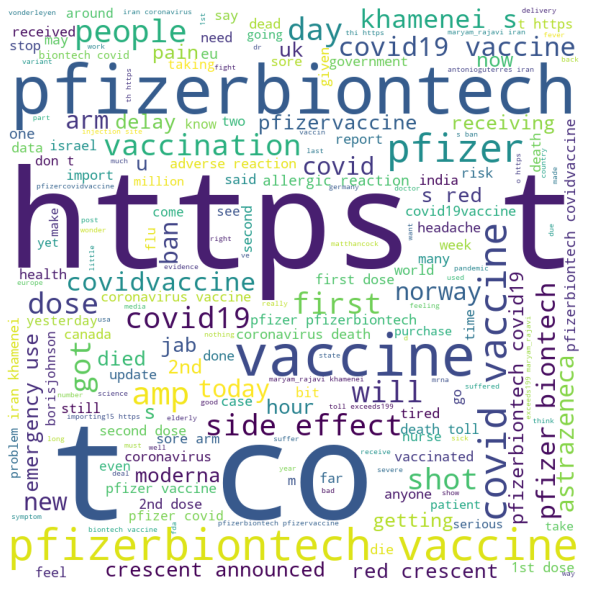

In [119]:
#Wordcloud for negative data
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in negative.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [120]:
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer().lemmatize
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [122]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)), stop_words = stopwords, strip_accents = 'unicode')


In [123]:
tdm = vectorizer.fit_transform(positive['text'])


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


In [124]:
vectorizer.vocabulary_.items()


dict_items([('folk said', 3327), ('said daikon', 7687), ('daikon paste', 1735), ('paste treat', 6257), ('treat cytokine', 9464), ('cytokine storm', 1734), ('russian vaccine', 7636), ('vaccine created', 9909), ('created last', 1697), ('doe anyone', 2033), ('anyone useful', 439), ('useful whether', 9678), ('whether covid', 10548), ('covid vaccine', 1684), ('vaccine safe', 10125), ('safe whilst', 7657), ('claim fame', 1302), ('fame success', 2954), ('success patriotic', 8665), ('patriotic competition', 6280), ('many bright', 5368), ('bright day', 1012), ('day best', 1790), ('best winning', 850), ('best wish', 851), ('agency released', 203), ('released information', 7359), ('information health', 4630), ('health care', 4114), ('care provider', 1134), ('provider patient', 6966), ('patient shipped', 6273), ('shipped million', 8005), ('woman healthcare', 10692), ('healthcare provider', 4145), ('provider asking', 6965), ('asking safety', 620), ('anyone wondering', 442), ('wondering approval', 1

In [125]:
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]


In [126]:
tfidf_weights[0:10]


[('folk said', 0.408248290463863),
 ('said daikon', 0.408248290463863),
 ('daikon paste', 0.408248290463863),
 ('paste treat', 0.408248290463863),
 ('treat cytokine', 0.408248290463863),
 ('cytokine storm', 0.408248290463863),
 ('russian vaccine', 1.1547005383792515),
 ('vaccine created', 1.1547005383792515),
 ('created last', 1.1547005383792515),
 ('doe anyone', 1.0707913208671453)]

In [127]:
#Creating wordcloud for positive TFIDF Data
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))

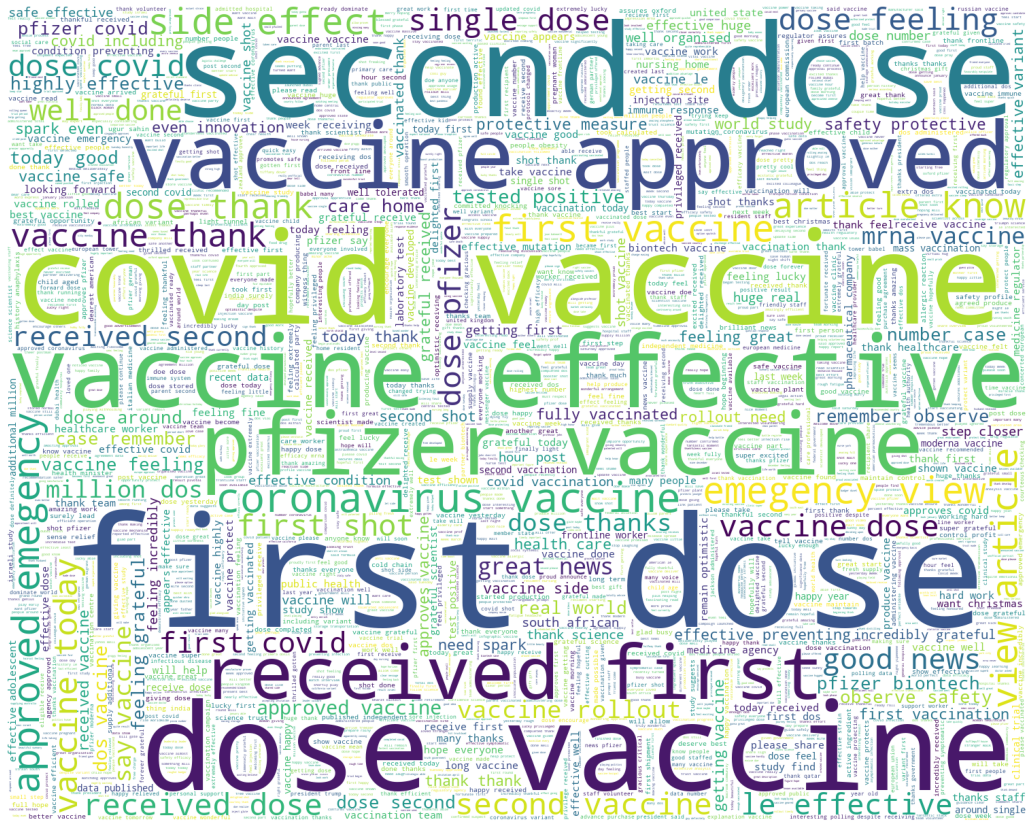

In [128]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')

### Hugging Face

In [130]:
!pip install pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 26.8 MB/s 
     |████████████████████████████████| 7.6 MB 61.9 MB/s 
     |████████████████████████████████| 182 kB 65.3 MB/s 


In [132]:
!pip install Dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 14.1 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 


In [134]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 23.6 MB/s 
     |████████████████████████████████| 212 kB 47.8 MB/s 
     |████████████████████████████████| 132 kB 53.6 MB/s 
     |████████████████████████████████| 127 kB 80.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [135]:
# Call libraries:
# 1.1 Hugging Face related:

from transformers import pipeline
from datasets import load_dataset
from datasets import Dataset

In [136]:
import pandas as pd
data = pd.read_csv("vaccination_tweets.csv")

In [137]:
# Transform pandas dataframe to hugging face dataset:

dataset = Dataset.from_pandas(data)

In [139]:
#Look at 3 rows of column of interest:

dataset['text'][:3]

['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
 "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",
 '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P']

# sentiment analysis using hugging face

In [140]:
# Instantiate 'pipeline' for sentiment-anaysis
#     Once instantiated, 'classifier' object
#     can be used for sentiment analysis:

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [141]:
classifier1 = pipeline("sentiment-analysis",
                         model="ProsusAI/finbert"
                        )

classifier2 = pipeline("sentiment-analysis",
                       model="finiteautomata/bertweet-base-sentiment-analysis"
                       )  

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [142]:
classifier(dataset['text'][:30])

[{'label': 'NEGATIVE', 'score': 0.9946714043617249},
 {'label': 'POSITIVE', 'score': 0.8969964981079102},
 {'label': 'NEGATIVE', 'score': 0.997570812702179},
 {'label': 'POSITIVE', 'score': 0.9912139773368835},
 {'label': 'NEGATIVE', 'score': 0.9955068826675415},
 {'label': 'NEGATIVE', 'score': 0.9987230896949768},
 {'label': 'NEGATIVE', 'score': 0.998323380947113},
 {'label': 'POSITIVE', 'score': 0.9995377063751221},
 {'label': 'NEGATIVE', 'score': 0.9905767440795898},
 {'label': 'NEGATIVE', 'score': 0.9960852861404419},
 {'label': 'NEGATIVE', 'score': 0.9973651766777039},
 {'label': 'NEGATIVE', 'score': 0.9923698902130127},
 {'label': 'NEGATIVE', 'score': 0.982143223285675},
 {'label': 'NEGATIVE', 'score': 0.9796895980834961},
 {'label': 'NEGATIVE', 'score': 0.9949652552604675},
 {'label': 'NEGATIVE', 'score': 0.9668164253234863},
 {'label': 'NEGATIVE', 'score': 0.9893110990524292},
 {'label': 'NEGATIVE', 'score': 0.9896165132522583},
 {'label': 'NEGATIVE', 'score': 0.994919836521148

In [144]:
print("\n===========")
classifier1(dataset['text'][:30])

[{'label': 'neutral', 'score': 0.6707918643951416},
 {'label': 'neutral', 'score': 0.8230448961257935},
 {'label': 'neutral', 'score': 0.8794354200363159},
 {'label': 'neutral', 'score': 0.8925039172172546},
 {'label': 'neutral', 'score': 0.9271830320358276},
 {'label': 'neutral', 'score': 0.9240986704826355},
 {'label': 'neutral', 'score': 0.8350502252578735},
 {'label': 'neutral', 'score': 0.8871840238571167},
 {'label': 'neutral', 'score': 0.9329378604888916},
 {'label': 'neutral', 'score': 0.9316650629043579},
 {'label': 'neutral', 'score': 0.8899480700492859},
 {'label': 'neutral', 'score': 0.9103307723999023},
 {'label': 'neutral', 'score': 0.7865947484970093},
 {'label': 'neutral', 'score': 0.8934484720230103},
 {'label': 'neutral', 'score': 0.7558043003082275},
 {'label': 'neutral', 'score': 0.8141353726387024},
 {'label': 'neutral', 'score': 0.9237633347511292},
 {'label': 'neutral', 'score': 0.705474853515625},
 {'label': 'neutral', 'score': 0.48232412338256836},
 {'label': '

In [145]:
print("\n===========")
classifier2(dataset['text'][:10])

[{'label': 'NEU', 'score': 0.7965682744979858},
 {'label': 'NEU', 'score': 0.7326122522354126},
 {'label': 'NEU', 'score': 0.9703397154808044},
 {'label': 'NEU', 'score': 0.9043493270874023},
 {'label': 'NEG', 'score': 0.941145122051239},
 {'label': 'NEU', 'score': 0.8870730400085449},
 {'label': 'NEG', 'score': 0.7802467942237854},
 {'label': 'POS', 'score': 0.9701784253120422},
 {'label': 'NEU', 'score': 0.9391865730285645},
 {'label': 'NEU', 'score': 0.9417745471000671}]

# Text Summarization

In [146]:
# Create text summarize object:
 
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [147]:
summarizer(dataset['text'][:5])

Your max_length is set to 142, but you input_length is only 36. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 142, but you input_length is only 39. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 142, but you input_length is only 58. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 142, but you input_length is only 43. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your max_length is set to 142, but you input_length is only 48. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


[{'summary_text': ' Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech . Same folks have said daakon paste has been used to treat a\xa0cycycyne\xa0c cytokine\xa0storm\xa0and could help treat a similar storm . #pfizer bioNTech: Daikon is a good candidate for a new drug .'},
 {'summary_text': " While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… has evaded . Hopefully, this is a vaccination effort that will be the biggest in the history of the world's vaccination effort . The world has not been able to vaccinate more than 100,000 people this year ."},
 {'summary_text': ' Russian vaccine is created to last 2-4 years, according to experts . Vaccine is made to last between 2 and 4 years . #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 .'},
 {'summary_text': ' Facts are immutable, even when you\'re not ethically sturdy enough to acknowledge them . You were born i… and you\'re born 

### Text Generation

In [148]:
# Text generation pipeline:
generator = pipeline('text-generation', model = 'gpt2')

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [149]:
# 10.1 Generate text
generator(dataset['text'][:5], max_length = 30, num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 34, but `max_length` is set to 30. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 37, but `max_length` is set to 30. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 56, but `max_length` is set to 30. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 42, but `max_length` is set to 30. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 47, but

[[{'generated_text': 'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF —'},
  {'generated_text': 'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF —'},
  {'generated_text': 'Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF —'}],
 [{'generated_text': "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm7"},
  {'generated_text': "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm7"},
  {'generated_text': "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhmY"}],
 [{'generated_text': '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to